## Global Youth Tobacco Survey (GYTS-4)

The fourth round of Global Youth Tobacco Survey (GYTS-4) was conducted in 2019 by the International Institute for Population Sciences (IIPS) under the Ministry of Health and Family Welfare (MoHFW). The survey was designed to produce national estimates of tobacco use among school going children aged 13-15 years at the state level and Union Territory (UT) by sex, location of school (rural-urban), and management of school (public-private).

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_excel('data.xls')
dataframe = dataframe[dataframe['State/UT'] != 'India']
dataframe

,State/UT,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other people’s tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed ‘tobacco-free school’ guidelines (%),Schools aware of the policy for displaying ‘tobacco-free school’ board (%)
3,Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
4,Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,0.7,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5
5,Andaman and Nicobar Islands,Rural,26.8,5.1,10.2,4.4,4.8,1.4,3.2,1.3,...,21.7,22.0,20.5,70.6,65.0,60.4,88.0,2.4,64.2,100.0
6,Andhra Pradesh,Total,7.3,2.6,4.4,1.8,2.6,1.1,2.3,0.8,...,9.1,22.9,30.6,72.9,50.2,50.8,48.5,9.1,51.5,36.4
7,Andhra Pradesh,Urban,4.5,0.7,2.0,0.7,1.2,0.4,1.2,0.3,...,10.6,18.4,34.8,78.2,64.1,62.4,58.3,8.3,50.0,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Uttarakhand,Urban,39.5,25.7,35.9,24.8,19.4,9.7,22.2,7.7,...,22.4,35.3,35.4,67.7,60.6,67.4,42.9,0.0,42.9,57.1
104,Uttarakhand,Rural,28.2,15.7,22.9,14.2,10.7,6.3,11.3,4.8,...,14.4,24.4,21.5,61.7,46.9,52.2,52.4,19.1,76.2,61.9
105,West Bengal,Total,17.3,7.1,9.3,5.2,5.4,3.6,5.5,2.9,...,21.0,25.1,19.9,73.7,48.1,49.3,94.3,65.7,85.7,91.4
106,West Bengal,Urban,18.0,6.9,9.1,4.1,5.0,2.2,2.9,1.4,...,23.4,39.3,26.3,74.1,74.8,74.1,85.7,57.1,71.4,71.4


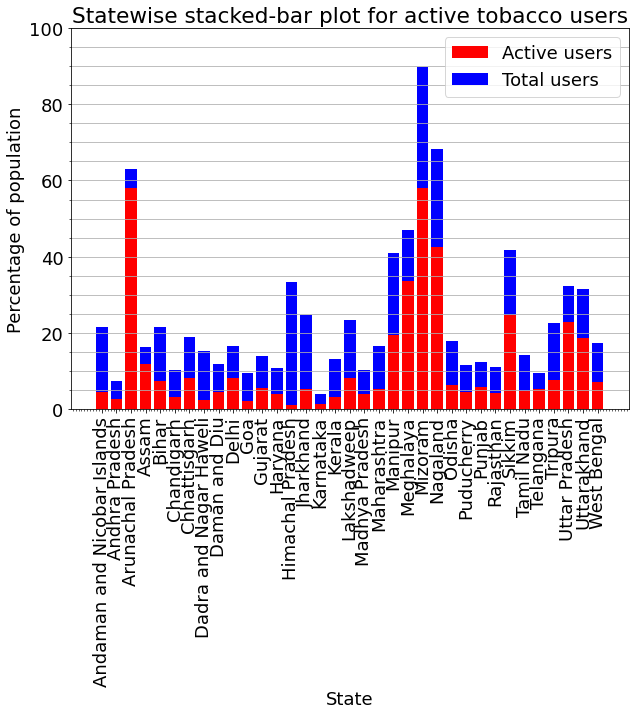

In [3]:
df = dataframe[dataframe.Area == 'Total']
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 18})

y1 = df['Current tobacco users (%)']
y2 = df['Ever tobacco users (%)'] - df['Current tobacco users (%)']
plt.xticks(rotation = 90)

plt.bar(df['State/UT'], y1, color='r')
plt.bar(df['State/UT'], y2, bottom=y1, color='b')

plt.legend(["Active users", "Total users"])
plt.minorticks_on()

plt.title("Statewise stacked-bar plot for active tobacco users")
plt.xlabel("State")
plt.ylabel("Percentage of population")
plt.ylim(0, 100)

plt.minorticks_on()
plt.grid(b=True, which='both', axis='y')
plt.show()

States belonging to the seven sisters have more number of active users than historical count. This behaviour can be justified by the low temperatures of these areas, which drives people to consume artificial stimulants. This hypothesis is cemented by decreasing usage in states with hotter climates.

/opt/anaconda3/envs/ds/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


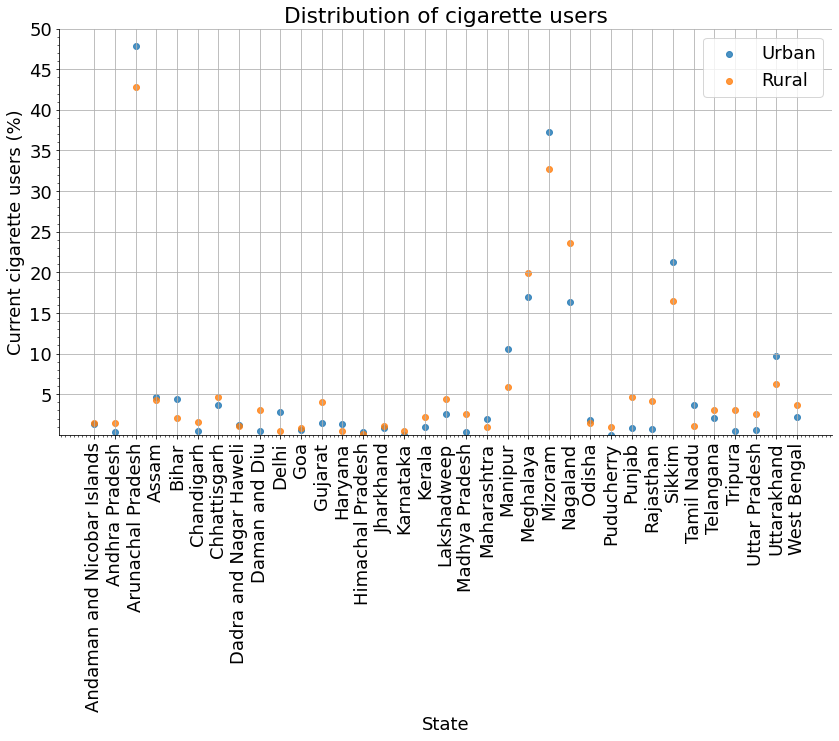

In [4]:
df_temp = dataframe[dataframe.Area.isin(["Urban", "Rural"])]
sns.lmplot('State/UT', 'Current cigarette users (%)', df_temp, hue='Area', fit_reg=False, legend=False)
fig = plt.gcf()
fig.set_size_inches(25, 7)

plt.legend(loc='upper right')
plt.xticks(rotation = 90)

plt.ylim(0, 50)
plt.yticks([5*(i+1) for i in range(10)])
plt.minorticks_on()
plt.grid(b=True, which='major')

plt.title("Distribution of cigarette users")
plt.xlabel("State")
plt.show()

This plot shows that, number of cigarette users are higher in rural areas of states with low-medium population.

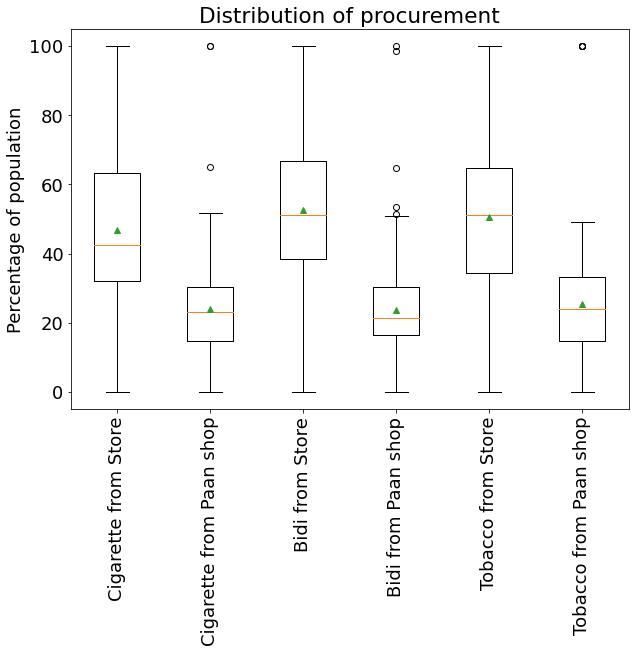

In [5]:
cig_store = dataframe['Major source of tobacco product- Cigarette: Store   (%)']
cig_paan = dataframe['Major source of tobacco product- Cigarette: Paan shop (%)']
bidi_store = dataframe['Major source of tobacco product- Bidi: Store   (%)']
bidi_paan = dataframe['Major source of tobacco product- Bidi: Paan shop (%)']
smok_store = dataframe['Major source of tobacco product- Smokeless tobacco: Store   (%)']
smok_paan = dataframe['Major source of tobacco product- Smokeless tobacco: Paan shop  (%)']

plt.title("Distribution of procurement")
plt.boxplot([cig_store, cig_paan, bidi_store, bidi_paan, smok_store, smok_paan], showmeans=True)
plt.xticks([i for i in range(1,7)], ['Cigarette from Store', 'Cigarette from Paan shop', 'Bidi from Store', 'Bidi from Paan shop', 'Tobacco from Store', 'Tobacco from Paan shop'], rotation=90)
plt.ylabel("Percentage of population")
plt.show()

The above plot shows that cigarettes, bidi and tobacco products are majorly procured from stores rather than local paan shops.